Duplicate records: 1186
Remaining records after removing duplicates: 213764
Records with age = 0: 3912
Remaining records after removing age = 0: 209852
Survival counts:
 survived
1    206365
0      3487
Name: count, dtype: int64


/var/folders/m6/fz_qjnl51s70hy69d_st2z240000gn/T/ipykernel_93153/973012947.py:52: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['month'] = df['day_of_month'].apply(lambda x: 1 if x <= 15 else 12)
/var/folders/m6/fz_qjnl51s70hy69d_st2z240000gn/T/ipykernel_93153/973012947.py:61: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['hour'] = df['เวลาเกิดเหตุ'].apply(extract_start_time)
/var/folders/m6/fz_qjnl51s70hy69d_st2z240000gn/T/ipykernel_93153/973012947.py:62: SettingWithCopyWarning: 
A value is trying to


=== Question 1: Factors Affecting Survivability ===
Top 5 factors affecting survivability:
 อายุ            0.300834
hour            0.220304
day_of_month    0.115448
รถคู่กรณี       0.094295
การดื่มสุรา     0.056792
dtype: float64

=== Question 2: Effect of Helmet Use in Motorcycle Accidents ===


/Users/pupipatsingkhorn/miniconda3/envs/datascience/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Helmet Effect (ATE): 0.0060, Naive ATE: 0.0053

=== Question 3: Effect of Seatbelt Use in Car Accidents ===
Seatbelt Effect (ATE): 0.0102, Naive ATE: 0.0082

=== Question 4: Effect of Alcohol on Survivability ===


/Users/pupipatsingkhorn/miniconda3/envs/datascience/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/pupipatsingkhorn/miniconda3/envs/datascience/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://sci

Alcohol Effect (ATE): -0.0033

=== Question 5: Hospital Effect on Survivability ===
Standard deviation of hospital survival differences: 0.0530

=== Question 6: Survival Rates by Hour ===
Survival rates by hour:
 hour
0     0.977129
1     0.976551
2     0.977081
3     0.968915
4     0.961029
5     0.963644
6     0.975182
7     0.982484
8     0.986932
9     0.985718
10    0.987775
11    0.987389
12    0.988517
13    0.986929
14    0.985699
15    0.985589
16    0.988023
17    0.987726
18    0.983425
19    0.983295
20    0.980855
21    0.982590
22    0.980194
23    0.981573
Name: survived, dtype: float64


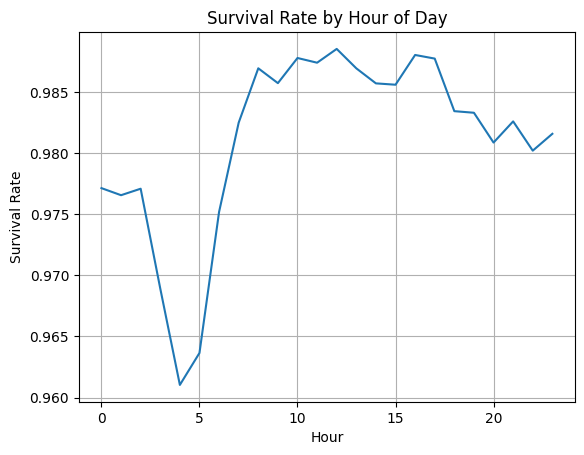

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from dowhy import CausalModel
import matplotlib.pyplot as plt
import os
import re

# === System and Path ===
repo_path = os.path.dirname(os.getcwd())
file_path = os.path.join(repo_path, "final-project", "data", "raw.xlsx")

# Load the data
df_raw = pd.read_excel(file_path)

# === Data Cleaning Functions ===
def clean_duplicate_rows(df):
    """Remove duplicate rows from the dataset."""
    dup_count = df.duplicated().sum()
    print(f"Duplicate records: {dup_count}")
    df = df.drop_duplicates()
    print(f"Remaining records after removing duplicates: {df.shape[0]}")
    return df

def clean_age_validity(df):
    """Remove records with age = 0."""
    print(f"Records with age = 0: {df[df['อายุ'] == 0].shape[0]}")
    df = df[df['อายุ'] > 0]
    print(f"Remaining records after removing age = 0: {df.shape[0]}")
    return df

def create_survival_label(df):
    """Create a binary survival column based on treatment outcome."""
    df['survived'] = (df['ผลการรักษา'] == 'ทุเลา/หาย').astype(int)
    print("Survival counts:\n", df['survived'].value_counts())
    df = df.drop(columns=['ผลการรักษา'])
    return df

def clean_datetime(df):
    """Process date and time columns."""
    # Extract year from festival name and convert to Gregorian calendar
    df['year'] = df['ชื่อเทศกาล'].str.extract(r'ปีใหม่\s*(\d{2})').astype(float) + 2500 - 543
    df['year'] = df['year'].astype(int)
    df.drop(columns=['ชื่อเทศกาล'], inplace=True)
    # Rename and clean day of month
    df.rename(columns={'วันที่เกิดเหตุ': 'day_of_month'}, inplace=True)
    df = df[df['day_of_month'].isin(range(1, 32))]
    # Assign month based on day
    df['month'] = df['day_of_month'].apply(lambda x: 1 if x <= 15 else 12)
    # Extract hour from time string
    def extract_start_time(time_str):
        if not isinstance(time_str, str) or 'ไม่ทราบ' in time_str:
            return None
        time_str = re.sub(r'[^0-9:\-]', '', time_str)
        if time_str.startswith('24'):
            time_str = time_str.replace('24', '00')
        return time_str.split('-')[0][:2]
    df['hour'] = df['เวลาเกิดเหตุ'].apply(extract_start_time)
    df.drop(columns=['เวลาเกิดเหตุ'], inplace=True)
    df.drop(columns=['year'], inplace=True)
    return df

def clean_gender(df, column='เพศ'):
    """Convert gender to binary (1 = male, 0 = female)."""
    gender_map = {'ชาย': 1, 'หญิง': 0}
    df['sex'] = df[column].map(gender_map)
    df.drop(columns=[column], inplace=True)
    return df

def clean_use_id_instead(df):
    """Drop province and hospital name, keeping hospital ID."""
    df.drop(columns=['จังหวัด', 'ชื่อโรงพยาบาลที่รับผู้บาดเจ็บ'], inplace=True)
    return df

# Apply cleaning functions
df_cleaned = clean_duplicate_rows(df_raw)
df_cleaned = clean_age_validity(df_cleaned)
df_cleaned = create_survival_label(df_cleaned)
df_cleaned = clean_datetime(df_cleaned)
df_cleaned = clean_gender(df_cleaned)
df_cleaned = clean_use_id_instead(df_cleaned)

# === Question 1: What factors matter the most to the survivability? ===
print("\n=== Question 1: Factors Affecting Survivability ===")
features = ['อายุ', 'sex', 'day_of_month', 'month', 'hour', 'ถนนที่เกิดเหตุ', 'สถานะ', 
            'รถผู้บาดเจ็บ', 'รถคู่กรณี', 'มาตรการ', 'การดื่มสุรา']
df_q1 = df_cleaned[features + ['survived']].copy()
df_q1 = df_q1.dropna(subset=['hour'])  # Drop rows with missing hour
# Encode categorical variables
le = LabelEncoder()
for col in ['ถนนที่เกิดเหตุ', 'สถานะ', 'รถผู้บาดเจ็บ', 'รถคู่กรณี', 'มาตรการ', 'การดื่มสุรา']:
    df_q1[col] = le.fit_transform(df_q1[col].astype(str))
# Convert hour to integer
df_q1['hour'] = df_q1['hour'].astype(int)
# Train Random Forest
X = df_q1.drop('survived', axis=1)
y = df_q1['survived']
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X, y)
# Get feature importances
importances = rf.feature_importances_
feature_importance = pd.Series(importances, index=X.columns).sort_values(ascending=False)
print("Top 5 factors affecting survivability:\n", feature_importance.head(5))

# === Question 2: How much does helmet help in motorcycle accidents? ===
print("\n=== Question 2: Effect of Helmet Use in Motorcycle Accidents ===")
df_motorcycle = df_cleaned[df_cleaned['รถผู้บาดเจ็บ'] == 'จักรยานยนต์'].copy()
df_motorcycle = df_motorcycle[df_motorcycle['มาตรการ'] != 'ไม่ทราบ']
df_motorcycle['helmet'] = (df_motorcycle['มาตรการ'] == 'ใส่หมวก').astype(int)
df_motorcycle = pd.get_dummies(df_motorcycle, columns=['ถนนที่เกิดเหตุ', 'การดื่มสุรา'], drop_first=True)
df_motorcycle = df_motorcycle.dropna(subset=['survived', 'helmet', 'อายุ', 'sex'])
confounders = ['อายุ', 'sex'] + [col for col in df_motorcycle.columns if 'ถนนที่เกิดเหตุ_' in col or 'การดื่มสุรา_' in col]
model = CausalModel(data=df_motorcycle, treatment='helmet', outcome='survived', common_causes=confounders)
identified_estimand = model.identify_effect()
estimate = model.estimate_effect(identified_estimand, method_name="backdoor.propensity_score_matching")
naive_ate = df_motorcycle[df_motorcycle['helmet'] == 1]['survived'].mean() - df_motorcycle[df_motorcycle['helmet'] == 0]['survived'].mean()
print(f"Helmet Effect (ATE): {estimate.value:.4f}, Naive ATE: {naive_ate:.4f}")

# === Question 3: How much does seatbelt help in car accidents? ===
print("\n=== Question 3: Effect of Seatbelt Use in Car Accidents ===")
car_types = ['รถเก๋ง/แท็กซี่', 'ปิคอัพ', 'รถตู้']
df_car = df_cleaned[df_cleaned['รถผู้บาดเจ็บ'].isin(car_types)].copy()
df_car = df_car[df_car['มาตรการ'] != 'ไม่ทราบ']
df_car['seatbelt'] = (df_car['มาตรการ'] == 'เข็มขัด').astype(int)
df_car = pd.get_dummies(df_car, columns=['ถนนที่เกิดเหตุ', 'การดื่มสุรา'], drop_first=True)
df_car = df_car.dropna(subset=['survived', 'seatbelt', 'อายุ', 'sex'])
confounders_car = ['อายุ', 'sex'] + [col for col in df_car.columns if 'ถนนที่เกิดเหตุ_' in col or 'การดื่มสุรา_' in col]
model_car = CausalModel(data=df_car, treatment='seatbelt', outcome='survived', common_causes=confounders_car)
estimand_car = model_car.identify_effect()
estimate_car = model_car.estimate_effect(estimand_car, method_name="backdoor.propensity_score_matching")
naive_ate_car = df_car[df_car['seatbelt'] == 1]['survived'].mean() - df_car[df_car['seatbelt'] == 0]['survived'].mean()
print(f"Seatbelt Effect (ATE): {estimate_car.value:.4f}, Naive ATE: {naive_ate_car:.4f}")

# === Question 4: Does alcohol factor into survivability? ===
print("\n=== Question 4: Effect of Alcohol on Survivability ===")
df_alcohol = df_cleaned[df_cleaned['การดื่มสุรา'] != 'ไม่ทราบ'].copy()
df_alcohol['alcohol'] = (df_alcohol['การดื่มสุรา'] == 'ดื่ม').astype(int)
df_alcohol = pd.get_dummies(df_alcohol, columns=['ถนนที่เกิดเหตุ', 'รถผู้บาดเจ็บ'], drop_first=True)
confounders_alcohol = ['อายุ', 'sex'] + [col for col in df_alcohol.columns if 'ถนนที่เกิดเหตุ_' in col or 'รถผู้บาดเจ็บ_' in col]
model_alcohol = CausalModel(data=df_alcohol, treatment='alcohol', outcome='survived', common_causes=confounders_alcohol)
estimand_alcohol = model_alcohol.identify_effect()
estimate_alcohol = model_alcohol.estimate_effect(estimand_alcohol, method_name="backdoor.propensity_score_matching")
print(f"Alcohol Effect (ATE): {estimate_alcohol.value:.4f}")

# === Question 5: Does the hospital affect survivability? ===
print("\n=== Question 5: Hospital Effect on Survivability ===")
features_hospital = ['อายุ', 'sex', 'ถนนที่เกิดเหตุ', 'สถานะ', 'รถผู้บาดเจ็บ', 'รถคู่กรณี', 'มาตรการ', 'การดื่มสุรา']
df_hospital = df_cleaned[features_hospital + ['survived', 'รหัส รพ.']].copy()
df_hospital = df_hospital.dropna(subset=features_hospital + ['survived'])
# Encode categorical variables
for col in ['ถนนที่เกิดเหตุ', 'สถานะ', 'รถผู้บาดเจ็บ', 'รถคู่กรณี', 'มาตรการ', 'การดื่มสุรา']:
    df_hospital[col] = LabelEncoder().fit_transform(df_hospital[col].astype(str))
X_hospital = df_hospital.drop(['survived', 'รหัส รพ.'], axis=1)
y_hospital = df_hospital['survived']
log_reg = LogisticRegression(max_iter=1000).fit(X_hospital, y_hospital)
df_hospital['expected_survival'] = log_reg.predict_proba(X_hospital)[:, 1]
# Calculate observed and expected survival rates per hospital
hospital_rates = df_hospital.groupby('รหัส รพ.').agg({'survived': 'mean', 'expected_survival': 'mean'})
hospital_rates['difference'] = hospital_rates['survived'] - hospital_rates['expected_survival']
std_diff = hospital_rates['difference'].std()
print(f"Standard deviation of hospital survival differences: {std_diff:.4f}")

# === Question 6: Any other interesting information? ===
print("\n=== Question 6: Survival Rates by Hour ===")
df_hour = df_cleaned[df_cleaned['hour'].notnull()].copy()
df_hour['hour'] = df_hour['hour'].astype(int)
hourly_survival = df_hour.groupby('hour')['survived'].mean()
print("Survival rates by hour:\n", hourly_survival)
# Plot survival rates by hour
hourly_survival.plot(title='Survival Rate by Hour of Day', xlabel='Hour', ylabel='Survival Rate')
plt.grid(True)
plt.show()
